In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , GridSearchCV

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv("heart_data.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape


(303, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
correlation = df.corr()

<Axes: >

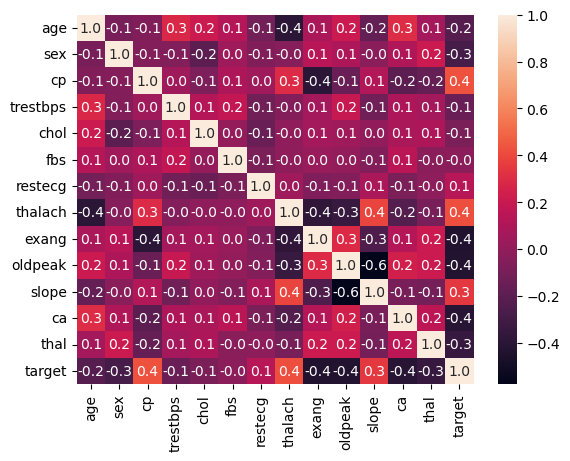

In [18]:

sns.heatmap(data=correlation,annot=True,fmt='.1f')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop(columns="target",axis=1)

In [22]:
y = df['target']

In [23]:
se = StandardScaler()
X = se.fit_transform(X)

In [24]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [26]:
y = np.asarray(y)

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
X = np.asarray(X)

In [29]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

# Model Selection

Comparing the model with default hyperparameters

In [30]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [39]:
def compare(models):
    for model in models:
        cv_score = cross_val_score(model,X,y,cv=5)
        mean_accuray = sum(cv_score)/len(cv_score)
        mean_accuray = mean_accuray * 100
        mean_accuray = round(mean_accuray,2)
        print(f"Cross Validation Accuraies for {model} = {cv_score} ")
        print(f"Accuracy score of the , {model} = { mean_accuray} %")
        print("-----------------------------------------------------------")
        
        

In [40]:
compare(models)

Cross Validation Accuraies for LogisticRegression(max_iter=1000) = [0.81967213 0.8852459  0.83333333 0.88333333 0.76666667] 
Accuracy score of the , LogisticRegression(max_iter=1000) = 83.77 %
-----------------------------------------------------------
Cross Validation Accuraies for SVC(kernel='linear') = [0.81967213 0.8852459  0.83333333 0.86666667 0.78333333] 
Accuracy score of the , SVC(kernel='linear') = 83.77 %
-----------------------------------------------------------
Cross Validation Accuraies for KNeighborsClassifier() = [0.78688525 0.8852459  0.81666667 0.86666667 0.75      ] 
Accuracy score of the , KNeighborsClassifier() = 82.11 %
-----------------------------------------------------------
Cross Validation Accuraies for RandomForestClassifier(random_state=0) = [0.85245902 0.8852459  0.81666667 0.81666667 0.78333333] 
Accuracy score of the , RandomForestClassifier(random_state=0) = 83.09 %
-----------------------------------------------------------


Compaing Models with Different Hyperparameters using GridSearchCV

In [41]:
models = [LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [42]:
parameters = {
    'log_reg' : {
        'C' : [1,5,10,20]
    } ,
    'svc' : {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },
    'knn': {
        'n_neighbors':[3,5,10]
    },
    'random_forest_hyperparameters' : {
        'n_estimators' : [10,20,30,40,60,80,100]
    }
}

In [43]:
model_keys = list(parameters.keys())

In [44]:
model_keys

['log_reg', 'svc', 'knn', 'random_forest_hyperparameters']

In [58]:
def model_selection(models,hyperparameters):
    
    result = []
    i = 0
    for model in models:
        key = model_keys[i]
        para = hyperparameters[key]
        i += 1
        print(model)
        print(para)
        classifier = GridSearchCV(model,para,cv=5)
        
        classifier.fit(X,y)
        
        result.append({
            'Model' : model,
            'Highest Score' : round(classifier.best_score_*100,2),
            'Best Hyperparameters' : classifier.best_params_
        })
        
    result_df = pd.DataFrame(result,columns=['Model','Highest Score','Best Hyperparameters'])

    return result_df

In [59]:
model_selection(models,parameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 30, 40, 60, 80, 100]}


,Model,Highest Score,Best Hyperparameters
0,LogisticRegression(max_iter=1000),83.77,{'C': 1}
1,SVC(),83.77,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),83.76,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),83.42,{'n_estimators': 80}
